In [1]:
from pytrends.request import TrendReq
from scipy.stats import linregress
import time
import openpyxl
from openpyxl import load_workbook
from datetime import date, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import pandas as pd
from string import ascii_uppercase

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'

In [3]:
#initiate pytrends. docs: https://pypi.org/project/pytrends/
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10, 25))

In [4]:
terms = ['inflation', 'unemployment']

In [5]:
volume = [0 for num in range(0,len(terms))]

In [6]:
def get_trends(terms):
    for i in range(0,len(terms)):
        if i == 0:
            trends = scrape_google(terms[i:i+1])
        else:
            trends = pd.concat([trends, scrape_google(terms[i:i+1])], axis=1)
    return trends

In [7]:
#All categories: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

def scrape_google(term):
    pytrends.build_payload(term, cat=0, timeframe='2019-01-01 2022-04-01', geo='US', gprop='')
    trends = pytrends.interest_over_time()
    try:
        trends = trends.drop(columns=['isPartial'])
    except:
        pass
    
    return trends

In [8]:
trends_df = get_trends(terms)

In [9]:
trends = trends_df.copy()
trends

,inflation,unemployment
date,,
2019-01-06,27,6
2019-01-13,28,5
2019-01-20,27,6
2019-01-27,31,5
2019-02-03,30,5
...,...,...
2022-02-27,57,6
2022-03-06,100,6
2022-03-13,65,6


In [10]:
trends = trends.reset_index()

In [11]:
trends['year'] = trends.date.apply(lambda x: x.year)
trends['month'] = trends.date.apply(lambda x: x.month)
trends['yyyy-mm'] = trends.date.apply(lambda x: x.strftime('%Y-%m'))

In [12]:
trends

,date,inflation,unemployment,year,month,yyyy-mm
0,2019-01-06,27,6,2019,1,2019-01
1,2019-01-13,28,5,2019,1,2019-01
2,2019-01-20,27,6,2019,1,2019-01
3,2019-01-27,31,5,2019,1,2019-01
4,2019-02-03,30,5,2019,2,2019-02
...,...,...,...,...,...,...
164,2022-02-27,57,6,2022,2,2022-02
165,2022-03-06,100,6,2022,3,2022-03
166,2022-03-13,65,6,2022,3,2022-03
167,2022-03-20,56,6,2022,3,2022-03


In [13]:
trends['matplotlib_time'] = trends['date'].apply(lambda x: mdates.date2num(x))

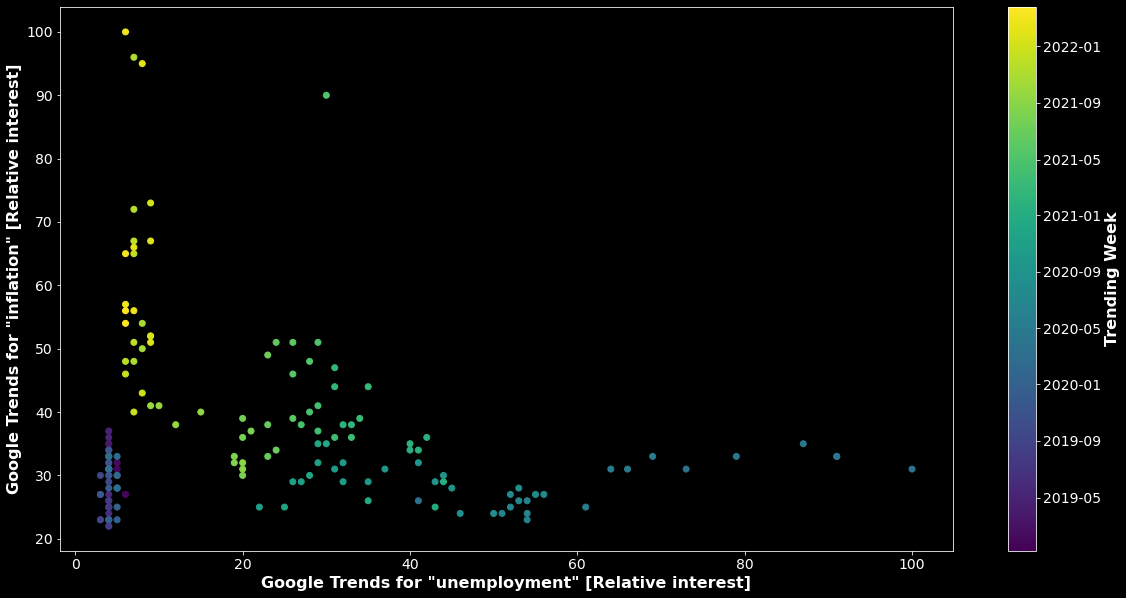

In [14]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots()
plot = plt.scatter(trends['unemployment'], trends['inflation'], c=trends['matplotlib_time'], cmap='viridis')
loc = mdates.AutoDateLocator()
cbar = fig.colorbar(plot, ticks=loc, format=mdates.AutoDateFormatter(loc))
plt.xlabel('Google Trends for "unemployment" [Relative interest]')
plt.ylabel('Google Trends for "inflation" [Relative interest]')
cbar.set_label('Trending Week')
plt.savefig('phillips_curve.png', bbox_inches='tight')
plt.show()